Midterm Bài 3.  Dự báo Heart Disease

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() 

In [2]:
np.random.seed(1)

In [3]:
#Import data trực tiếp từ github (data info: https://www.kaggle.com/datasets/mathurinache/cholesterol)
df = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/dataset_2190_cholesterol.csv')

In [4]:
#df

In [5]:
df.num.unique() #check cột num xem có giá trị nào khác 0 và 1 không

array([0, 2, 1, 3, 4], dtype=int64)

In [6]:
df.drop(df[(df['num'] >1)].index, inplace=True)


Downsampling

In [7]:
df['num'].value_counts(normalize=True)
#data bị imbalanced

0    0.748858
1    0.251142
Name: num, dtype: float64

In [8]:
type_0 = df[df['num'] == 0]
type_1 = df[df['num'] == 1]
print(type_0.shape)
print(type_1.shape)

(164, 14)
(55, 14)


In [9]:
from sklearn.utils import resample
type_0_downsample = resample(type_0, replace=True, n_samples = len(type_1), random_state= 1)
print(type_0_downsample.shape)

(55, 14)


In [10]:
df = pd.concat([type_0_downsample, type_1])

In [11]:
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 67 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       110 non-null    int64  
 1   sex       110 non-null    int64  
 2   cp        110 non-null    int64  
 3   trestbps  110 non-null    int64  
 4   fbs       110 non-null    int64  
 5   restecg   110 non-null    int64  
 6   thalach   110 non-null    int64  
 7   exang     110 non-null    int64  
 8   oldpeak   110 non-null    float64
 9   slope     110 non-null    int64  
 10  ca        110 non-null    object 
 11  thal      110 non-null    object 
 12  num       110 non-null    int64  
 13  chol      110 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 12.9+ KB


In [12]:
df.ca.unique() #check có value string nào không

array(['0', '1', '2', '3', '?'], dtype=object)

In [13]:
df.drop(df[(df['ca'] == "?")].index, inplace=True)

In [14]:
df.thal.unique() #check có value string nào không

array(['7', '3', '6'], dtype=object)

In [15]:
df.drop(df[(df['thal'] == "?")].index, inplace=True)

convert các cột object -> int

In [16]:
df[["ca", "thal"]] = df[["ca", "thal"]].astype("int64")

In [17]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
chol          int64
dtype: object

In [18]:
df.age.unique()

array([54, 51, 29, 62, 41, 58, 76, 74, 71, 59, 44, 64, 47, 35, 42, 68, 43,
       45, 37, 52, 49, 53, 56, 40, 50, 48, 67, 57, 61, 60, 46, 65, 70, 63],
      dtype=int64)

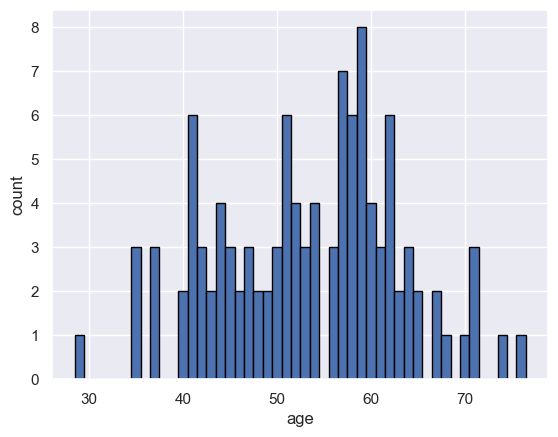

In [19]:
ages = np.array(df.age.values)

d = np.diff(np.unique(ages)).min()
left_of_first_bin = ages.min() - float(d)/2
right_of_last_bin = ages.max() + float(d)/2
plt.hist(ages, np.arange(left_of_first_bin, right_of_last_bin + d, d), edgecolor = "black")
plt.ylabel("count")
plt.xlabel("age")
plt.show()

In [20]:
#X_class=df['age'].values
#len(X_class)

In [21]:
num_col = df['num']
df = df.drop("num", axis = 1)
#df = df.drop("age", axis = 1)
df["num"] = num_col
df

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chol,num
67,54,1,3,150,0,2,165,0,1.6,1,0,7,232,0
253,51,0,3,120,0,2,157,0,0.6,1,0,3,295,0
132,29,1,2,130,0,2,202,0,0.0,1,0,3,204,0
249,62,1,2,128,1,2,140,0,0.0,1,0,3,208,0
240,41,1,2,110,0,0,153,0,0.0,1,0,3,235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,67,1,3,152,0,2,150,0,0.8,2,0,7,212,1
294,63,0,4,124,0,0,136,1,0.0,2,0,3,197,1
297,57,0,4,140,0,0,123,1,0.2,2,0,7,241,1
298,45,1,1,110,0,0,132,0,1.2,2,0,7,264,1


<Axes: >

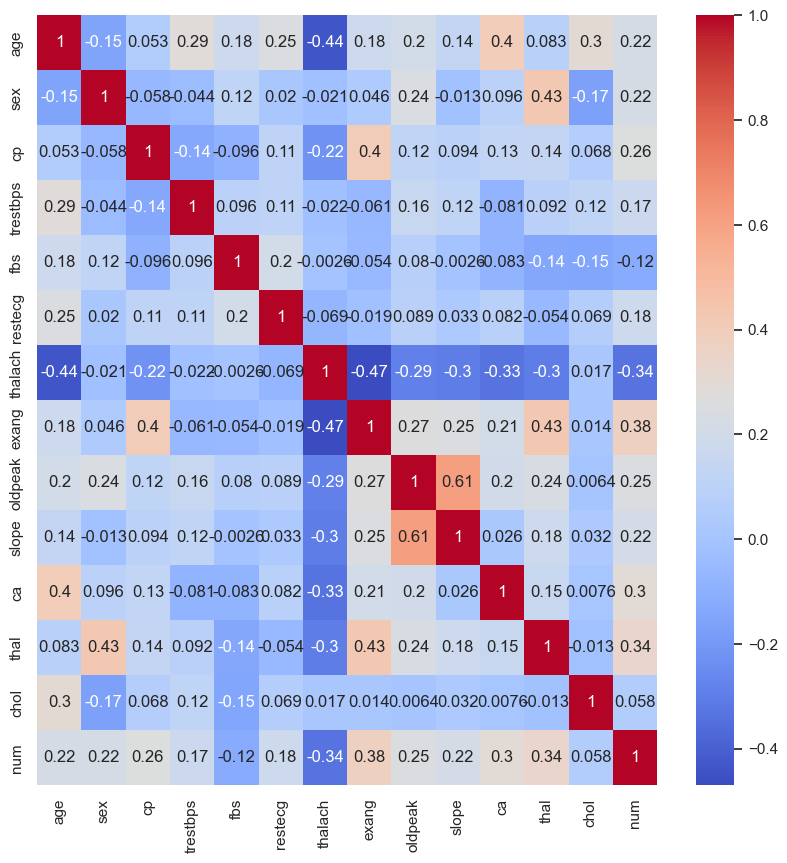

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Các biến có correlation với num: thal, ca, slope, oldpeak, exang, thalach, cp, sex, age (trên 0.2)

In [23]:
y = df.num.values
X = df[["thal", "ca", "slope", "oldpeak", "exang", "thalach", "cp", "sex", "age"]]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Xây dựng mô hình logistic

In [25]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\truon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
#tính độ chính xác
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy1 =  accuracy_score(y_train, model.predict(X_train))
print("Train acc: %.2f" % accuracy1)
accuracy2 = accuracy_score(y_test, model.predict(X_test))
print("Test acc: %.2f" % accuracy2)

Train acc: 0.74
Test acc: 0.70


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        13
           1       1.00      0.50      0.67        20

    accuracy                           0.70        33
   macro avg       0.78      0.75      0.69        33
weighted avg       0.83      0.70      0.69        33



In [30]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [10, 10]], dtype=int64)

Text(0.5, 20.049999999999997, 'Dự báo')

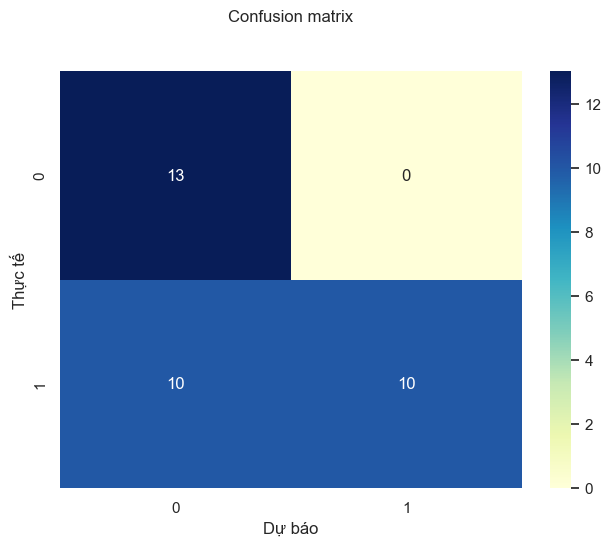

In [31]:
class_names=['0',"1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

Logistic + BaggingClassifier

In [32]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(LogisticRegression(),random_state=1)
bag.fit(X_train, y_train)
accuracy_bag = bag.score(X_test,y_test)
y_pred=bag.predict(X_test)

C:\Users\truon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\truon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [33]:
#tính độ chính xác
from sklearn import metrics
accuracy1 =  accuracy_score(y_train, bag.predict(X_train))
print("Train acc: %.2f" % accuracy1)
accuracy2 = accuracy_score(y_test, bag.predict(X_test))
print("Test acc: %.2f" % accuracy2)

Train acc: 0.74
Test acc: 0.70


In [34]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [10, 10]], dtype=int64)

Text(0.5, 20.049999999999997, 'Dự báo')

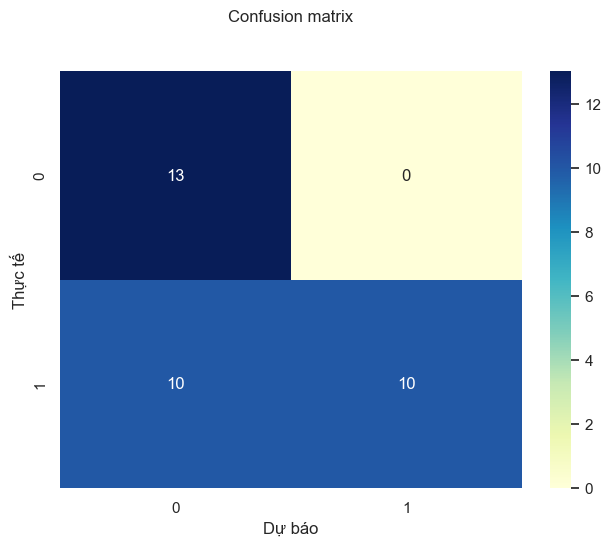

In [35]:
class_names=['0','1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

Xây dựng mô hình SVM

In [36]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C= 0.1, gamma=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [38]:
#tính độ chính xác
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy1 =  accuracy_score(y_train, model.predict(X_train))
print("Train acc: %.2f" % accuracy1)
accuracy2 = accuracy_score(y_test, model.predict(X_test))
print("Test acc: %.2f" % accuracy2)

Train acc: 0.71
Test acc: 0.73


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        13
           1       1.00      0.55      0.71        20

    accuracy                           0.73        33
   macro avg       0.80      0.78      0.73        33
weighted avg       0.84      0.73      0.72        33



In [40]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [ 9, 11]], dtype=int64)

Text(0.5, 20.049999999999997, 'Dự báo')

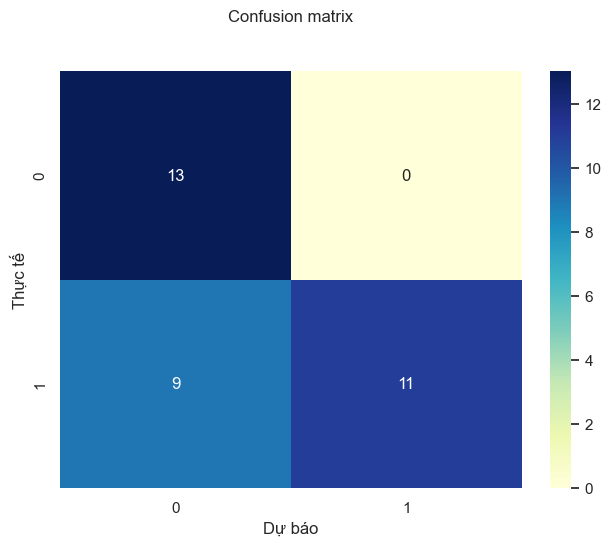

In [41]:
class_names=['0',"1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

Xây dựng mô hình Decision Tree

In [42]:
from sklearn import tree

In [43]:
# tim max_depth
score_tree_total=[]
for i in range(2,20,1):
  model_tree = tree.DecisionTreeClassifier(max_depth=i,random_state= 1)
  model_tree.fit(X_train, y_train)
  score = model_tree.score(X_test, y_test)
  score_tree_total.append([score])

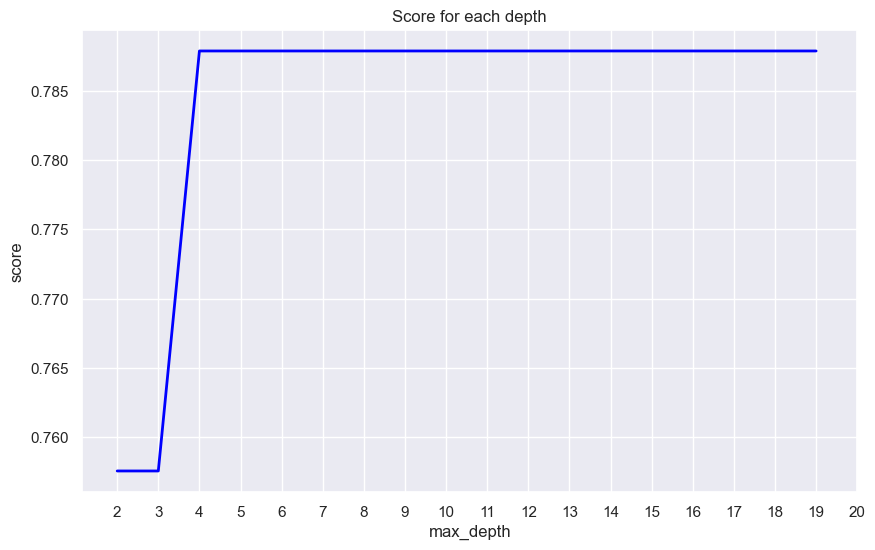

In [44]:
plt.figure(figsize=(10,6))
plt.title('Score for each depth')
plt.plot(range(2,20,1), score_tree_total, linewidth=2, color='blue')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.xticks(range(2,21,1))
plt.axvline(x=4, color = "red", linestyle = "--")
plt.show()

max_depth = 4

In [45]:
model_tree = tree.DecisionTreeClassifier(max_depth = 4)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

In [46]:
#tính độ chính xác
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy1 =  accuracy_score(y_train, model_tree.predict(X_train))
print("Train acc: %.2f" % accuracy1)
accuracy2 = accuracy_score(y_test, model_tree.predict(X_test))
print("Test acc: %.2f" % accuracy2)

Train acc: 0.84
Test acc: 0.79


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       1.00      0.65      0.79        20

    accuracy                           0.79        33
   macro avg       0.82      0.82      0.79        33
weighted avg       0.86      0.79      0.79        33



In [48]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [ 7, 13]], dtype=int64)

Text(0.5, 20.049999999999997, 'Dự báo')

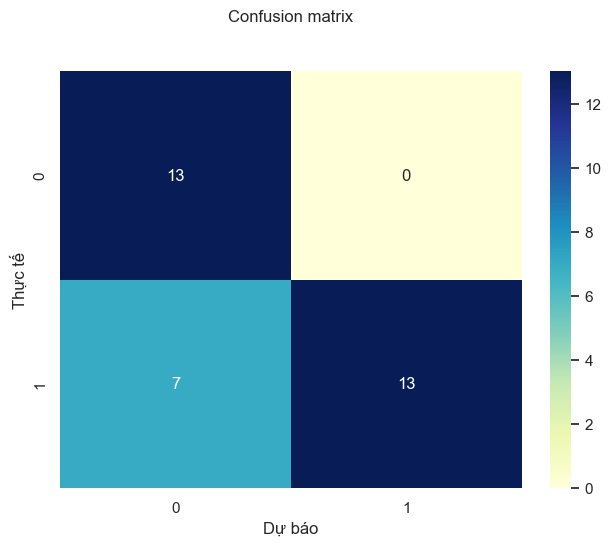

In [49]:
class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# tim n_estimators
score_total=[]
for i in range(2,20,1):
  model_rf = RandomForestClassifier(n_estimators=i,random_state= 1)
  model_rf.fit(X_train, y_train)
  score = model_rf.score(X_test, y_test)
  score_total.append([score])

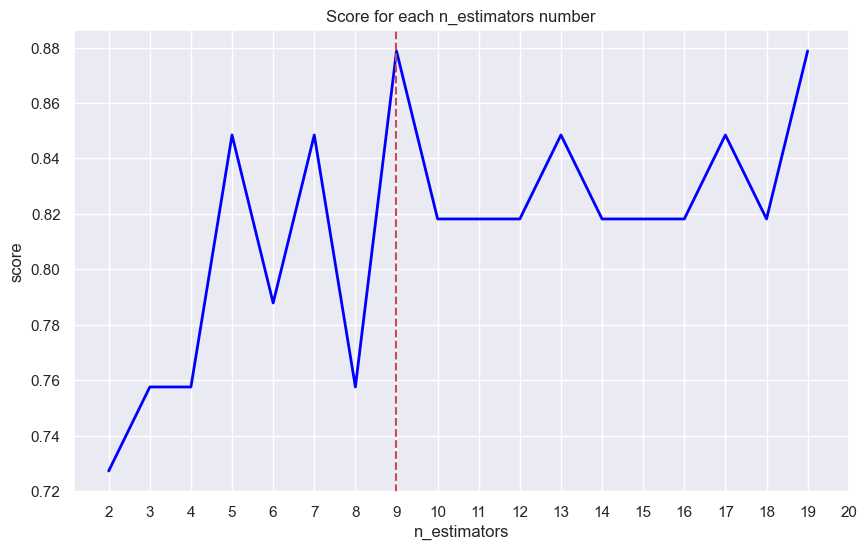

In [52]:
plt.figure(figsize=(10,6))
plt.title('Score for each n_estimators number')
plt.plot(range(2,20,1), score_total, linewidth=2, color='blue')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.xticks(range(2,21,1))
plt.axvline(x=9, color='r', linestyle='--')
plt.show()

In [53]:
model_rf = RandomForestClassifier(n_estimators=9, random_state = 1) #số lượng các cây quyết định được sử dụng trong mô hình
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=9, random_state=1)

In [54]:
y_pred=model_rf.predict(X_test)

In [55]:
#tính độ chính xác
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy1 =  accuracy_score(y_train, model_rf.predict(X_train))
print("Train acc: %.2f" % accuracy1)
accuracy2 = accuracy_score(y_test, model_rf.predict(X_test))
print("Test acc: %.2f" % accuracy2)

Train acc: 0.99
Test acc: 0.88


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.80      0.89        20

    accuracy                           0.88        33
   macro avg       0.88      0.90      0.88        33
weighted avg       0.91      0.88      0.88        33



Text(0.5, 20.049999999999997, 'Dự báo')

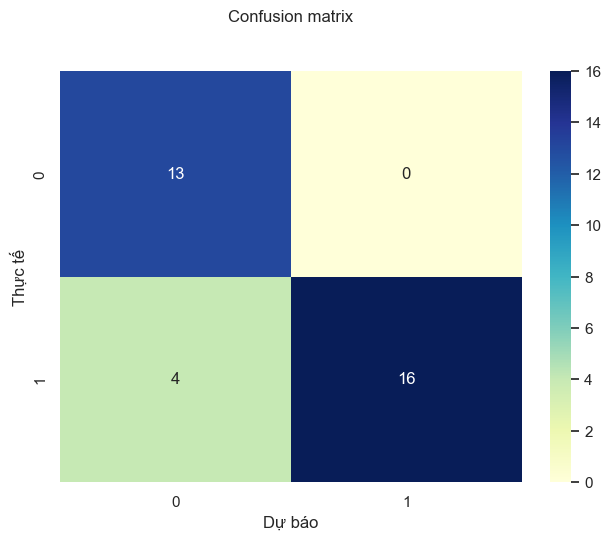

In [57]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=['1','2','3'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# tim n_neighbors
score_total=[]
for i in range(2,20,1):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(X_train, y_train)
  score = model_knn.score(X_test, y_test)
  score_total.append([score])

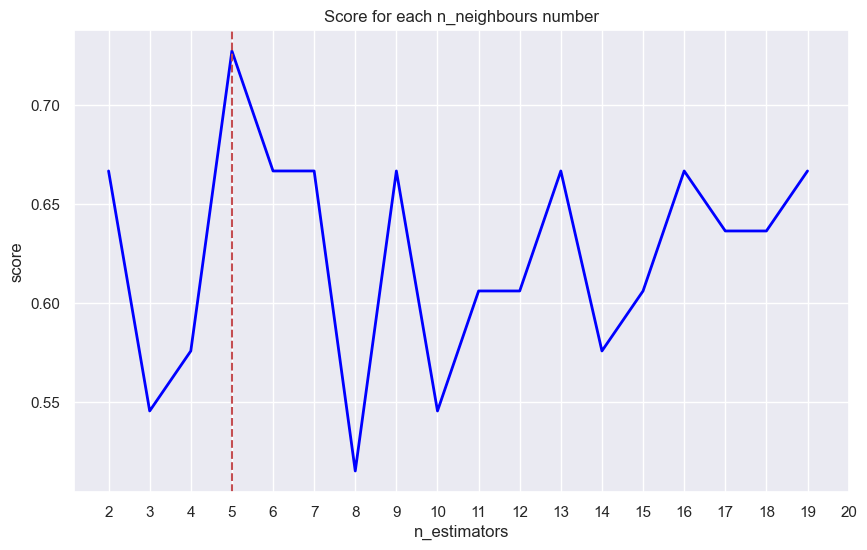

In [60]:
plt.figure(figsize=(10,6))
plt.title('Score for each n_neighbours number')
plt.plot(range(2,20,1), score_total, linewidth=2, color='blue')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.xticks(range(2,21,1))
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

In [61]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)

KNeighborsClassifier()

In [62]:
#tính độ chính xác
from sklearn import metrics
accuracy1 =  accuracy_score(y_train, model_knn.predict(X_train))
print("Train acc: %.2f" % accuracy1)
accuracy2 = accuracy_score(y_test, model_knn.predict(X_test))
print("Test acc: %.2f" % accuracy2)

Train acc: 0.72
Test acc: 0.79


In [63]:
y_pred=model_knn.predict(X_test)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.81      0.85      0.83        20

    accuracy                           0.79        33
   macro avg       0.78      0.77      0.77        33
weighted avg       0.79      0.79      0.79        33



In [65]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 9,  4],
       [ 3, 17]], dtype=int64)

Text(0.5, 20.049999999999997, 'Dự báo')

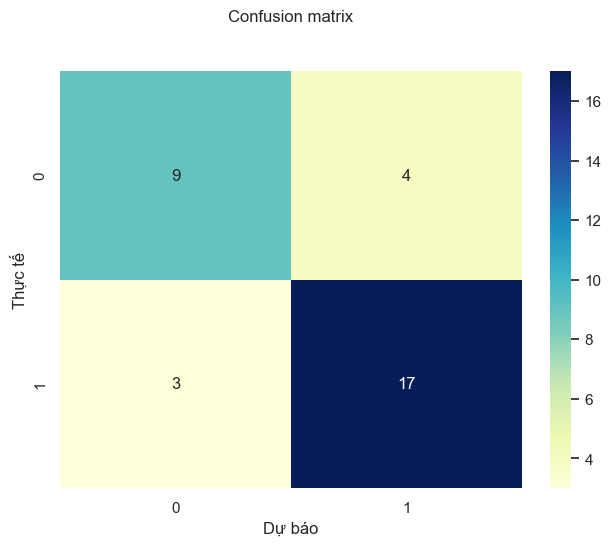

In [66]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

GNB

In [67]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB() #Gán mô hình từ thư viện vào biến GNB
GNB.fit(X_train, y_train) # Training mô hình
y_pred=GNB.predict(X_test) #Dự báo

In [68]:
#tính độ chính xác
accuracy1 =  accuracy_score(y_train, GNB.predict(X_train))
print("Train acc: %.2f" % accuracy1)
accuracy2 = accuracy_score(y_test, GNB.predict(X_test))
print("Test acc: %.2f" % accuracy2)

Train acc: 0.74
Test acc: 0.73


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        13
           1       1.00      0.55      0.71        20

    accuracy                           0.73        33
   macro avg       0.80      0.78      0.73        33
weighted avg       0.84      0.73      0.72        33



In [70]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [ 9, 11]], dtype=int64)

Text(0.5, 20.049999999999997, 'Dự báo')

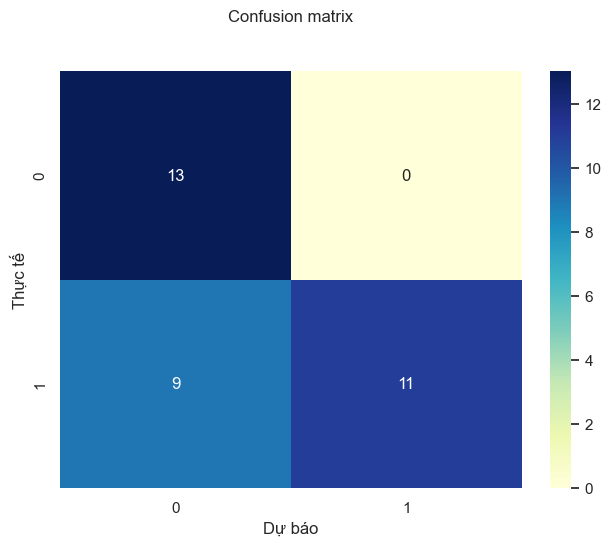

In [71]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

C:\Users\truon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\truon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

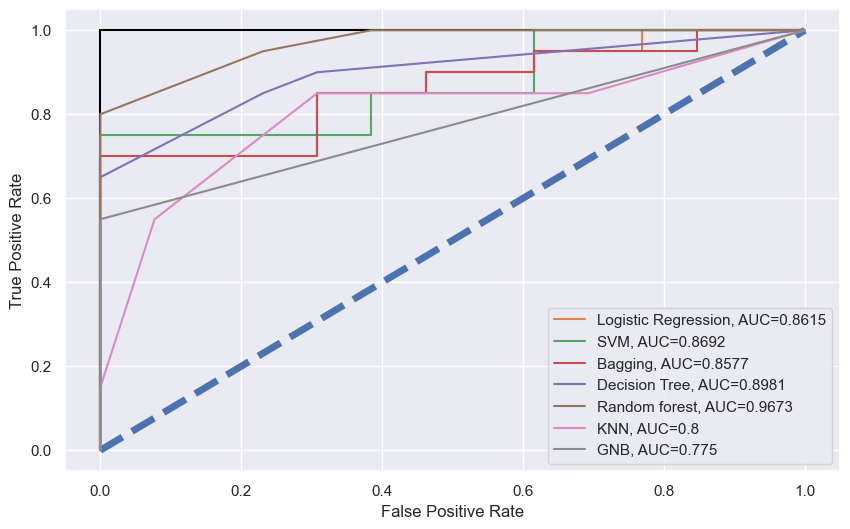

In [72]:
#set up plotting area
plt.figure(figsize=(10,6)).clf()
plt.plot([0,1],ls='--',linewidth=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit SVM and plot ROC curve
model = SVC(kernel='linear', C= 0.1, gamma=0.3, probability= True)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit logistic regression + bagging classifier and ROC curve
bag = BaggingClassifier(LogisticRegression(),random_state=1)
bag.fit(X_train, y_train)
y_pred = bag.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Bagging, AUC="+str(auc))

# fit decision tree
model_tree = tree.DecisionTreeClassifier(max_depth = 4)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

# fit rf:
model_rf = RandomForestClassifier(n_estimators=9, random_state = 1)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random forest, AUC="+str(auc))

#fit knn:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X,y)
y_pred = model_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#fit GNB:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred=GNB.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="GNB, AUC="+str(auc))

#add legend
plt.legend()

| Model | TrainAccuracy | TestAccuracy |
| --- | --- | --- |
| Logistic | 0.74 | 0.7 |
| SVM | 0.71 | 0.73 |
| Logistic + Bagging | 0.72 | 0.67 |
| Decision Tree | 0.84 | 0.79 |
| Random Forest | 0.99 | 0.88 |
| KNN | 0.72 | 0.79 |
| GNB | 0.74 | 0.73 |

Kết luận: Random Forest có độ chính xác cao nhất